In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r'G:\Rakesh\mlproject\notebook\data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [24]:
df.dtypes

gender                          int64
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course         int64
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [18]:
df['gender']=df['gender'].map({'female':1,'male':0})

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,0,72,72,74
1,1,group C,some college,standard,1,69,90,88
2,1,group B,master's degree,standard,0,90,95,93
3,0,group A,associate's degree,free/reduced,0,47,57,44
4,0,group C,some college,standard,0,76,78,75


In [22]:
df['test preparation course']=df['test preparation course'].map({'none':0,'completed':1})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [28]:
numeric_features= [feature for feature in df.columns if(df[feature].dtype!='O')]
category_features= [feature for feature in df.columns if(df[feature].dtype=='O')]

In [29]:
print(numeric_features)
print(category_features)

['gender', 'test preparation course', 'math score', 'reading score', 'writing score']
['race/ethnicity', 'parental level of education', 'lunch']


In [30]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,1,group B,bachelor's degree,standard,0,72,72,74,218
1,1,group C,some college,standard,1,69,90,88,247
2,1,group B,master's degree,standard,0,90,95,93,278
3,0,group A,associate's degree,free/reduced,0,47,57,44,148
4,0,group C,some college,standard,0,76,78,75,229


In [31]:
df["average"]=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,1,group B,bachelor's degree,standard,0,72,72,74,218,72.666667
1,1,group C,some college,standard,1,69,90,88,247,82.333333
2,1,group B,master's degree,standard,0,90,95,93,278,92.666667
3,0,group A,associate's degree,free/reduced,0,47,57,44,148,49.333333
4,0,group C,some college,standard,0,76,78,75,229,76.333333


In [34]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
print(reading_full)
print(writing_full)
print(math_full)


17
14
7


In [35]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()
print(reading_less_20)
print(writing_less_20)
print(math_less_20)


1
3
4


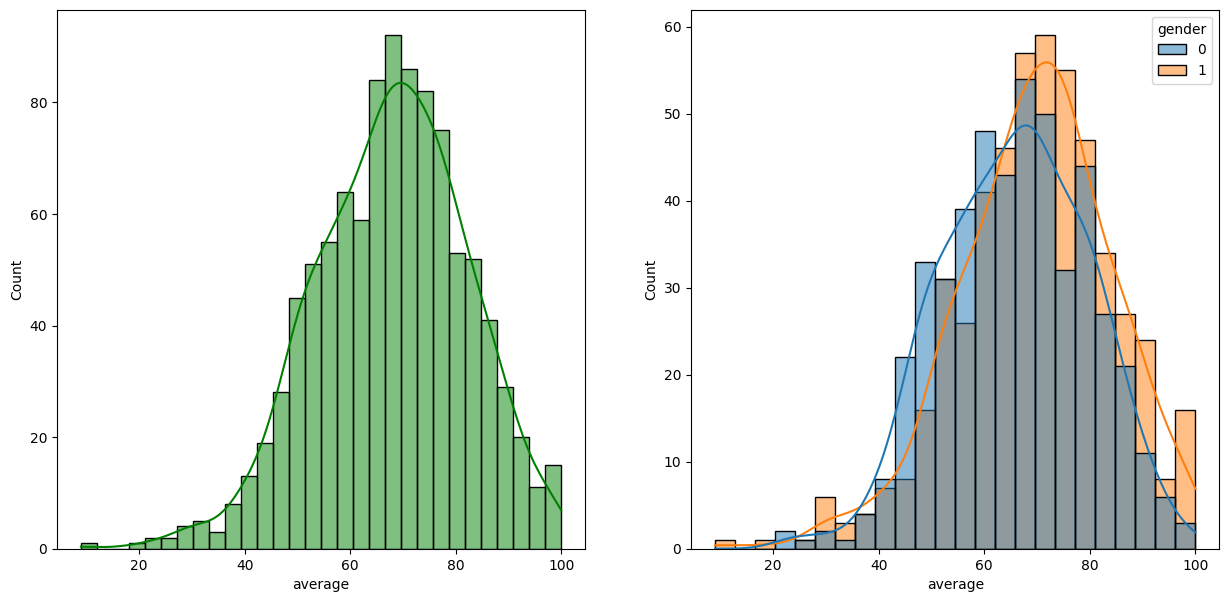

In [38]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue="gender")
plt.show()
